In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf

In [7]:
titles = pd.read_csv('data/titles.csv')
titles.tail(3)

,title,year
226010,Muukalainen,2008
226011,Byeolmyeongbuteun unjeonsa,1977
226012,Red Headed Woman,1932


In [8]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [11]:
cast.index.size

3442902

In [12]:
cast['title'].size

3442902

In [13]:
cast.title.size

3442902

In [14]:
mask = cast.n.isnull()
cast[~mask]

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
...,...,...,...,...,...,...
3442896,Stuttur Frakki,1993,Sveinbjörg Þórhallsdóttir,actress,Flugfreyja,24.0
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0


In [15]:
cast[cast.year==2017]

,title,year,name,type,character,n
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
15,Gook,2017,Kirlew 'bliss' Vilbon,actor,Bliss,NaN
18,Hustle Beach,2017,Pete 'Boretta' Torres,actor,Tony,NaN
55,Whitefolks,2017,Darryel 'Original Whitefolks' Woodson,actor,Himself,14.0
70,The Worst Nightmare,2017,Derek 'Tp Corleone' Perkins,actor,Phillip,NaN
...,...,...,...,...,...,...
3442778,Flaugstad,2017,Solveig Østby,actress,Lotte,NaN
3442852,Rewind: Die zweite Chance,2017,Idil Üner,actress,Beatrice Lenders,NaN
3442857,Nereden Nereye,2017,Özge Ünlütezcan,actress,Cansu Unlu,NaN
3442867,Kesif,2017,Asli Ünsalan,actress,Türkan,7.0


In [16]:
cast[(cast.year>=2017) & (cast.year < 2019)]

,title,year,name,type,character,n
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
15,Gook,2017,Kirlew 'bliss' Vilbon,actor,Bliss,NaN
18,Hustle Beach,2017,Pete 'Boretta' Torres,actor,Tony,NaN
48,Zeroville,2018,Mike 'Mad Dog' Adams,actor,Hippie Guitar Player,NaN
54,Hello Au Revoir,2018,Colette 'O'Connell,actor,Letty O,NaN
...,...,...,...,...,...,...
3442852,Rewind: Die zweite Chance,2017,Idil Üner,actress,Beatrice Lenders,NaN
3442857,Nereden Nereye,2017,Özge Ünlütezcan,actress,Cansu Unlu,NaN
3442867,Kesif,2017,Asli Ünsalan,actress,Türkan,7.0
3442886,Svanurinn,2017,Katla M. Þorgeirsdóttir,actress,Ólöf,NaN


In [17]:
cast[(cast.year==2017) | (cast.year == 2018)]

,title,year,name,type,character,n
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
15,Gook,2017,Kirlew 'bliss' Vilbon,actor,Bliss,NaN
18,Hustle Beach,2017,Pete 'Boretta' Torres,actor,Tony,NaN
48,Zeroville,2018,Mike 'Mad Dog' Adams,actor,Hippie Guitar Player,NaN
54,Hello Au Revoir,2018,Colette 'O'Connell,actor,Letty O,NaN
...,...,...,...,...,...,...
3442852,Rewind: Die zweite Chance,2017,Idil Üner,actress,Beatrice Lenders,NaN
3442857,Nereden Nereye,2017,Özge Ünlütezcan,actress,Cansu Unlu,NaN
3442867,Kesif,2017,Asli Ünsalan,actress,Türkan,7.0
3442886,Svanurinn,2017,Katla M. Þorgeirsdóttir,actress,Ólöf,NaN


In [18]:
cast[(cast.year>=1990) & (cast.title.str.contains("Batman"))]

,title,year,name,type,character,n
4140,Batman v Superman: Dawn of Justice,2016,Monib Abhat,actor,Angry Football Player 1,NaN
10819,Batman v Superman: Dawn of Justice,2016,Jay R. Adams,actor,Metropolis Cop,48.0
15302,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Bruce Wayne,1.0
15303,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,1.0
19338,Batman v Superman: Dawn of Justice,2016,Owais Ahmed,actor,Metropolis Citizen,21.0
...,...,...,...,...,...,...
3399081,The LEGO Batman Movie,2017,Lauren (VII) White,actress,Additional Voices,24.0
3415896,Batman v Superman: Dawn of Justice,2016,Janellyn Woo,actress,Citizen,NaN
3418933,Batman v Superman: Dawn of Justice,2016,Christina Wren,actress,Major Farris,59.0
3439112,B@ (Batman Parody Film),2016,Brittany Zimmermann,actress,Melissa,7.0


# Problems

1. How many movies are in the titles dataframe

In [13]:
amount = titles.title.count()
print("Amount:", amount)

Amount: 226013


2. How many movies have the title North by Northwest?

In [32]:
titles[titles.title.str.contains("North by Northwest")]

,title,year
201761,North by Northwest,1959


3. How many versions of Hamlet are there, when was the first made? The last?

In [77]:
all_hamlet = titles[titles.title.str.contains("Hamlet")]
all_hamlet.count()

title     55
year      55
decade    55
dtype: int64

In [97]:
all_hamlet = titles[titles.title.str.contains("Hamlet")]
sorted_hamlet = all_hamlet.sort_values('year')
sorted_hamlet.iloc[0]

title     Hamlet
year        1910
decade      1910
Name: 79939, dtype: object

In [90]:
all_hamlet = titles[titles.title.str.contains("Hamlet")]
sort_hamlet = all_hamlet.sort_values('year')
sort_hamlet.iloc[-1]

title     Hamlet: The Fall of a Sparrow
year                               2018
decade                             2010
Name: 202555, dtype: object

4. List all the movies called Treasure Island from oldest to newest

In [41]:
island_movies = titles[titles.title.str.contains("Treasure Island")]
island_movies.sort_values('year')

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
5854,The Secret of Treasure Island,1938
126321,Treasure Island,1950
8382,Return to Treasure Island,1954
26147,Five on a Treasure Island,1957
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985


5. How many movies were made in 1950? 1980? 2000?

In [103]:
titles['decade'] = titles.year // 10 * 10
titles.decade.value_counts()

2010    65830
2000    35730
1990    21547
1980    19532
1970    18476
1960    17419
1950    12664
1930    10245
1920     8954
1940     8561
1910     6752
2020      260
1900       39
1890        3
2110        1
Name: decade, dtype: int64

6. How many movies were made between 1950 and 1959? 1980 - 1989? 2000 - 2009?

In [111]:
cast[(cast.year>=1950) & (cast.year < 1960)]

,title,year,name,type,character,n
63,Fire Down Below,1957,'Stretch' Cox Troupe,actor,Limbo Dance by,20.0
65,Dorp aan de rivier,1958,Frans 't Hoen,actor,Dirk Jan,15.0
106,Ci sposeremo a Capri,1956,Quartetto 2+2,actor,Themselves,19.0
114,Die Todesarena,1953,Die 3 Motorellos,actor,Themselves,NaN
216,Palletoori Pilla,1950,Subba Rao A.V.,actor,Kampanna Dora,4.0
...,...,...,...,...,...,...
3442793,Styrmand Karlsen,1958,Clara Østø,actress,Dronning Viktoria,9.0
3442794,Styrmand Karlsen,1958,Clara Østø,actress,The Queen,9.0
3442796,Tre piger fra Jylland,1957,Clara Østø,actress,Frk. Lind,9.0
3442807,Toya,1956,Aslaug Øye,actress,moren til Trygve,19.0


7. How big was the cast of Metropolis?

In [120]:
metropolis_cast = cast[(cast.year==1927) & (cast.title.str.contains("Metropolis"))]
metropolis_cast.count()

title        33
year         33
name         33
type         33
character    33
n             9
dtype: int64

8. How many roles for actors were there in the 1950s? 1990s?

In [126]:
fiftys_actors = cast[(cast.year>=1950) & (cast.year < 1960) & (cast.type=='actor')]
fiftys_actors.count()

title        153559
year         153559
name         153559
type         153559
character    153559
n             79645
dtype: int64

In [127]:
fiftys_actors = cast[(cast.year>=1990) & (cast.year < 2000) & (cast.type=='actor')]
fiftys_actors.count()

title        245713
year         245713
name         245713
type         245713
character    245713
n            197231
dtype: int64

9. How many roles for actors & actresses over time?

In [18]:
roles = cast['decade'] = cast.year // 10 * 10 
roles.count()

3442902

10. How many "leading roles" were there in the 2000's?

In [134]:
leading_roles = cast[(cast.year>=2000) & (cast.year < 2010) & (cast.n== 1)]
leading_roles.count()

title        23593
year         23593
name         23593
type         23593
character    23593
n            23593
decade       23593
dtype: int64

11. How many roles received no ranking in the 2000's? 1950s?

In [143]:
no_ranking = cast[(cast.year>=2000) & (cast.year < 2010) & (cast.n.isnull())]
no_ranking.count()

title        232037
year         232037
name         232037
type         232037
character    232037
n                 0
decade       232037
dtype: int64

In [144]:
no_ranking = cast[(cast.year>=1950) & (cast.year < 1960) & (cast.n.isnull())]
no_ranking.count()

title        95406
year         95406
name         95406
type         95406
character    95406
n                0
decade       95406
dtype: int64

In [22]:
c = cast.set_index(['year', 'title'])
c

name     type  \
year title                                                                    
2015 Closet Monster                                       Buffy #1    actor   
1985 Suuri illusioni                                        Homo $    actor   
2017 Battle of the Sexes                                   $hutter    actor   
2015 Secret in Their Eyes                                  $hutter    actor   
     Steve Jobs                                            $hutter    actor   
...                                                            ...      ...   
1988 Foxtrot                                     Lilja Þórisdóttir  actress   
2004 Niceland (Population. 1.000.002)    Sigríður Jóna Þórisdóttir  actress   
1985 Skammdegi                                  Dalla Þórðardóttir  actress   
2003 U.S.S.S.S...                      Kristín Andrea Þórðardóttir  actress   
1999 Bye Bye Blue Bird                                Rosa á Rógvu  actress   

                                                     character     n  decade  
year title                                                                    
2015 Closet Monster                                    Buffy 4  31.0    2010  
1985 Suuri illusioni                                    Guests  22.0    1980  
2017 Battle of the Sexes                       Bobby Riggs Fan  10.0    2010  
2015 Secret in Their Eyes                      2002 Dodger Fan   NaN    2010  
     Steve Jobs                        1988 Opera House Patron   NaN    2010  
...                                                        ...   ...     ...  
1988 Foxtrot                                              Dóra  24.0    1980  
2004 Niceland (Population. 1.000.002)             Woman in Bus  26.0    2000  
1985 Skammdegi                                   Hjúkrunarkona   9.0    1980  
2003 U.S.S.S.S...                       Afgr.dama á bensínstöð  17.0    2000  
1999 Bye Bye Blue Bird                       Pensionatværtinde   NaN    1990  

[3442902 rows x 5 columns]

In [ ]:
nat = 

In [26]:
cast.sort_values(by='year').goupby('year').first()

AttributeError: 'DataFrame' object has no attribute 'goupby'

In [27]:
c = cast
c['decade'] = c.year // 10 * 10

In [29]:
cast.groupby([cast.year // 10 * 10, 'type']).size().unstack()

type,actor,actress
year,,
1890,2,1
1900,54,16
1910,27396,15733
1920,48112,23826
1930,149272,49298
1940,159799,50871
1950,153559,56331
1960,128132,54484
1970,142015,60977


In [4]:
symbols = "AMZN GOOG NTFX SPY".split()

In [5]:
data = yf.download(symbols, '2022-04-01')['Close']
data.head()

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- NTFX: No timezone found, symbol may be delisted


,AMZN,GOOG,NTFX,SPY
Date,,,,
2022-04-01 00:00:00,163.559998,140.699997,NaN,452.920013
2022-04-04 00:00:00,168.346497,143.642502,NaN,456.799988
2022-04-05 00:00:00,164.054993,141.063004,NaN,451.029999
2022-04-06 00:00:00,158.755997,137.175995,NaN,446.519989
2022-04-07 00:00:00,157.784500,136.464996,NaN,448.769989


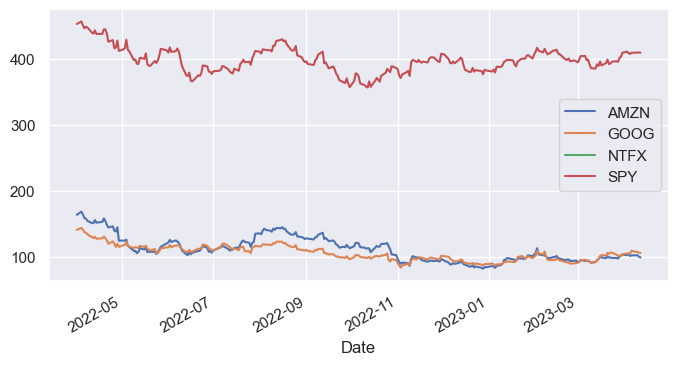

In [35]:
sb.set()
data.plot(figsize=(8,4));

In [36]:
amzn = data.AMZN

In [38]:
(amzn / amzn[0] - 1)

Date
2022-04-01    0.000000
2022-04-04    0.029264
2022-04-05    0.003026
2022-04-06   -0.029371
2022-04-07   -0.035311
                ...   
2023-04-05   -0.381878
2023-04-06   -0.376009
2023-04-10   -0.375336
2023-04-11   -0.389093
2023-04-12   -0.395451
Name: AMZN, Length: 258, dtype: float64

In [39]:
pct_chng = data.pct_change()
pct_chng

,AMZN,GOOG,NTFX,SPY
Date,,,,
2022-04-01,NaN,NaN,NaN,NaN
2022-04-04,0.029264,0.020913,NaN,0.008567
2022-04-05,-0.025492,-0.017958,NaN,-0.012631
2022-04-06,-0.032300,-0.027555,NaN,-0.009999
2022-04-07,-0.006119,-0.005183,NaN,0.005039
...,...,...,...,...
2023-04-05,-0.027417,-0.001617,NaN,-0.002618
2023-04-06,0.009496,0.037637,NaN,0.003901
2023-04-10,0.001078,-0.017906,NaN,0.001026


In [41]:
spy_corr = pct_chng.corr()['SPY']

In [43]:
spy_corr.sort_values()

GOOG    0.792827
AMZN    0.799327
SPY     1.000000
NTFX         NaN
Name: SPY, dtype: float64

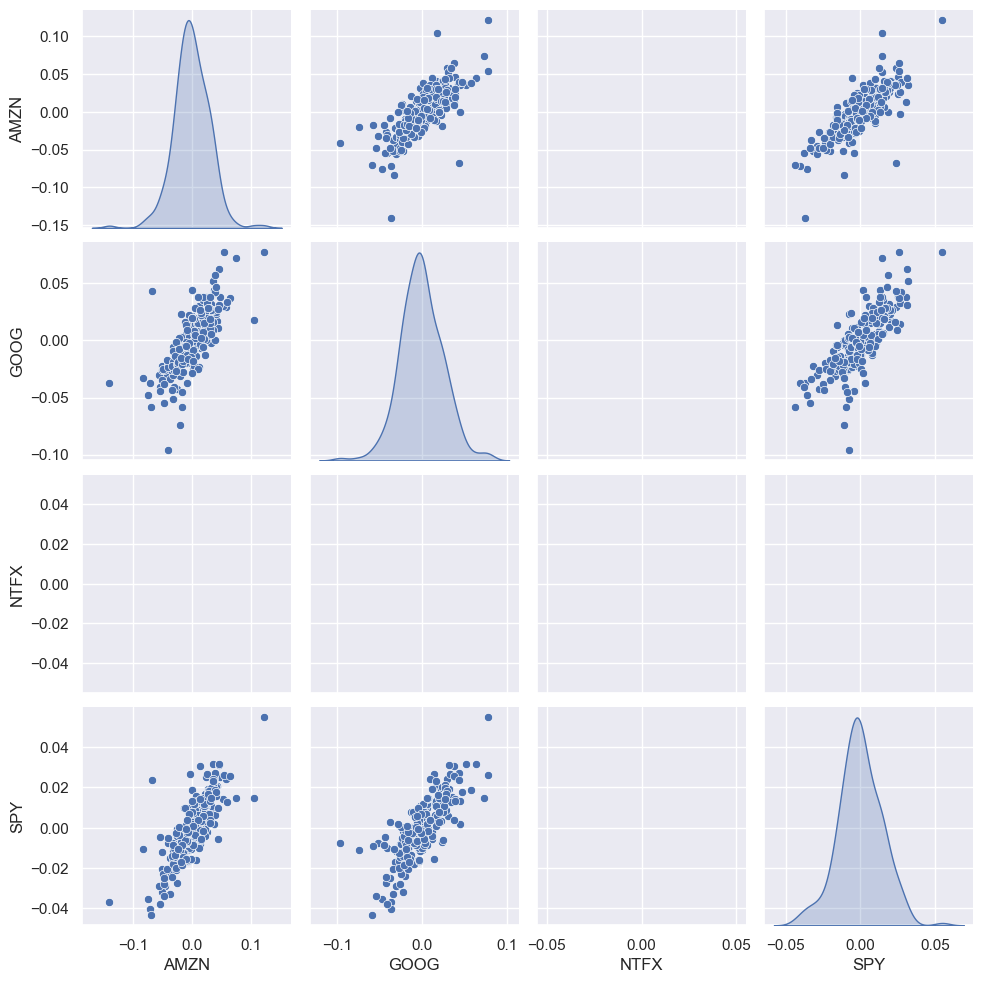

In [47]:
sb.pairplot(pct_chng, diag_kind='kde')

In [2]:
amzn = pd.DataFrame(amzn)
amzn['change'] = amzn.diff()

NameError: name 'pd' is not defined

In [1]:
amzn

NameError: name 'amzn' is not defined